In [1]:
from pylab import *

%run ~/pizza/src/pizza.py
%matplotlib inline

Pizza.py (9 Oct 2015), a toolkit written in Python
type ? for help, CTRL-D to quit
Loading tools ...
animate tool did not load:
  No module named ImageTk
image tool did not load:
  No module named Pmw
gl tool did not load:
  No module named OpenGL.Tk


In [2]:
data = dump("dump.lammpstrj")

1000 1010 1020 1030 1040 1050 1060 1070 1080 1090 1100 1110 1120 1130 1140 1150 1160 1170 1180 1190 1200 1210 1220 1230 1240 1250 1260 1270 1280 1290 1300 1310 1320 1330 1340 1350 1360 1370 1380 1390 1400 1410 1420 1430 1440 1450 1460 1470 1480 1490 1500 1510 1520 1530 1540 1550 1560 1570 1580 1590 1600 1610 1620 1630 1640 1650 1660 1670 1680 1690 1700 1710 1720 1730 1740 1750 1760 1770 1780 1790 1800 1810 1820 1830 1840 1850 1860 1870 1880 1890 1900 1910 1920 1930 1940 1950 1960 1970 1980 1990 2000 2010 2020 2030 2040 2050 2060 2070 2080 2090 2100 2110 2120 2130 2140 2150 2160 2170 2180 2190 2200 2210 2220 2230 2240 2250 2260 2270 2280 2290 2300 2310 2320 2330 2340 2350 2360 2370 2380 2390 2400 2410 2420 2430 2440 2450 2460 2470 2480 2490 2500 2510 2520 2530 2540 2550 2560 2570 2580 2590 2600 2610 2620 2630 2640 2650 2660 2670 2680 2690 2700 2710 2720 2730 2740 2750 2760 2770 2780 2790 2800 2810 2820 2830 2840 2850 2860 2870 2880 2890 2900 2910 2920 2930 2940 2950 2960 2970 2980 2990 

In [3]:
t = data.time(); nt = size(t); tmp_time, box, atoms, bonds, tris, lines = data.viz(0)

In [4]:
import seaborn
seaborn.set()

In [5]:
rcParams['figure.figsize'] = [10, 8]
rcParams['font.size'] = 16

In [6]:
ppa1 = array(data.vecs(t[-1], "c_PPA[1]"))
ppa2 = array(data.vecs(t[-1], "c_PPA[1]"))
ppa3 = array(data.vecs(t[-1], "c_PPA[1]"))

fx = array(data.vecs(t[-1], "fx"))
fy = array(data.vecs(t[-1], "fy"))
fz = array(data.vecs(t[-1], "fz"))

vol = array(data.vecs(t[-1], "c_VOR[1]"))

f = sqrt(fx**2 + fy**2 + fz**2)
press_f = f / vol


press = -(ppa1**2 + ppa2**2 + ppa3**2) / (3 * vol)

x = array(data.vecs(t[-1], "x"))
y = array(data.vecs(t[-1], "y"))
z = array(data.vecs(t[-1], "z"))

/home/atom/.local/lib/python2.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in divide
  if sys.path[0] == '':
/home/atom/.local/lib/python2.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in divide
  from ipykernel import kernelapp as app


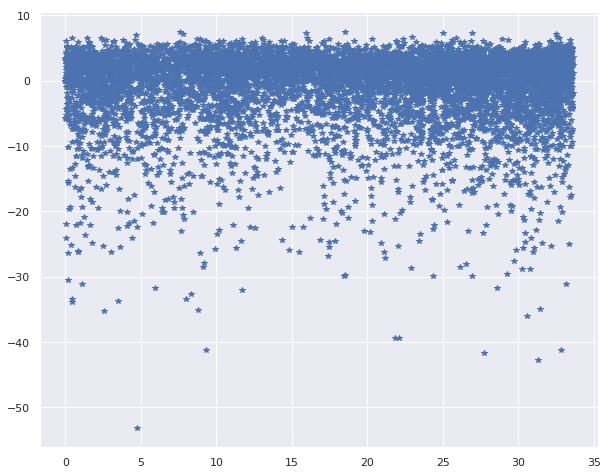

In [7]:
plot(x, ppa1, '*')

In [8]:
from mpl_toolkits.mplot3d import axes3d

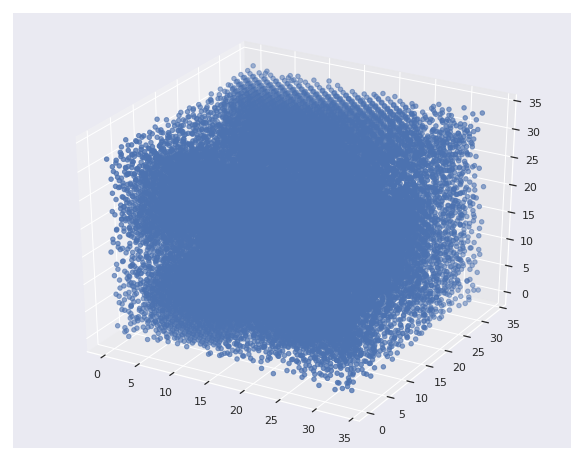

In [9]:
fig = figure()
ax = fig.gca(projection='3d')
ax.scatter(x, y, z)
show()

In [10]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.cm as cmx

/home/atom/.local/lib/python2.7/site-packages/matplotlib/colors.py:504: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


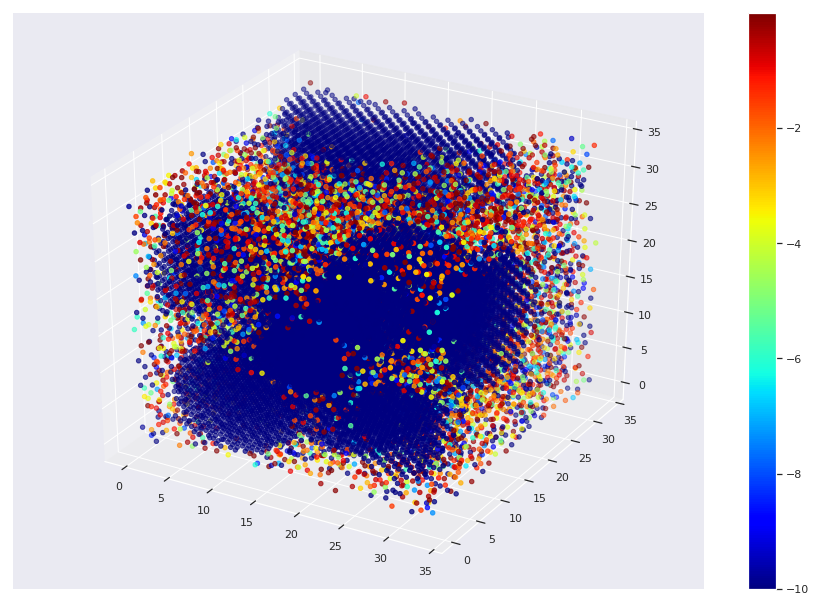

In [11]:
cNorm = matplotlib.colors.Normalize(vmin=-10, vmax=max(press))
cm = get_cmap('jet')
scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=cm)
fig = figure(figsize=(12,8))
ax = Axes3D(fig)
ax.scatter(x, y, z, c=scalarMap.to_rgba(press))
scalarMap.set_array(press)
fig.colorbar(scalarMap)
show()

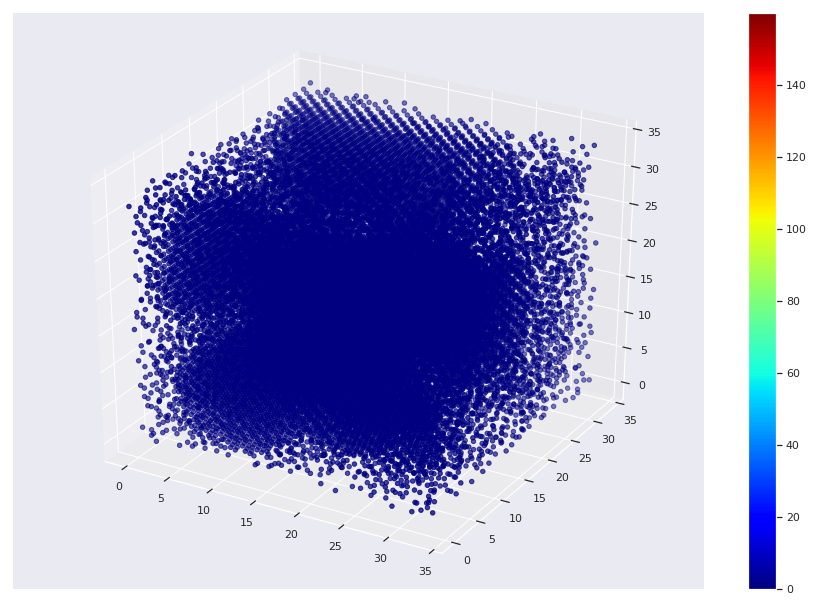

In [12]:
cNorm = matplotlib.colors.Normalize(vmin=min(f), vmax=max(f))
cm = get_cmap('jet')
scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=cm)
fig = figure(figsize=(12,8))
ax = Axes3D(fig)
ax.scatter(x, y, z, c=scalarMap.to_rgba(press))
scalarMap.set_array(press)
fig.colorbar(scalarMap)
show()

In [13]:
temps = loadtxt("temp.txt")
msd = loadtxt("msd.txt")[4::5, 1]

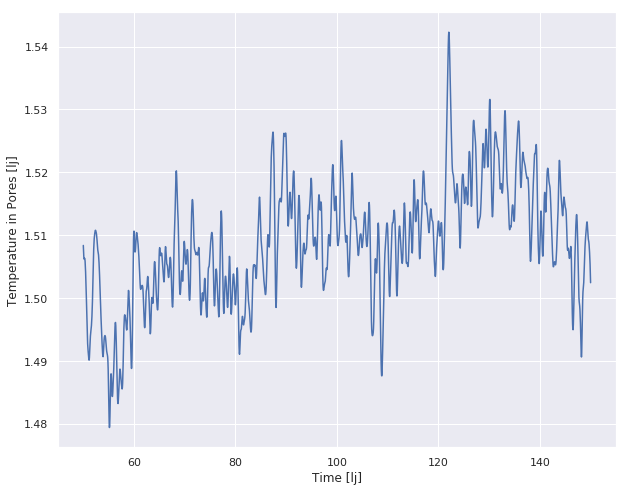

In [14]:
plot(temps[:, 0]*0.05, temps[:, 1], )
xlabel("Time [lj]")
ylabel("Temperature in Pores [lj]")
#title("Temperature in pores as function of time")
show()

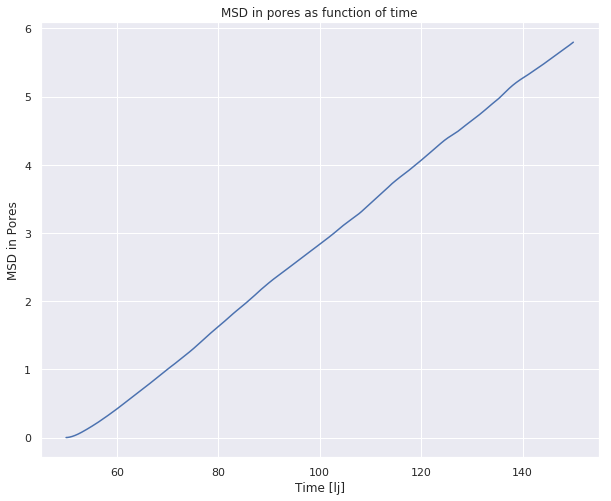

In [15]:
msd_t = temps[:, 0]*0.05
plot(msd_t, msd)
xlabel("Time [lj]")
ylabel("MSD in Pores")
title("MSD in pores as function of time")
show()